In [22]:
import pandas as pd
import os
from pyspark.sql import SparkSession
from util import load_data

import matplotlib.pyplot as plt

In [23]:
spark = SparkSession.builder.appName(
        "Airline Twitter Sentiment Analysis"
    ).getOrCreate()
df = load_data("E:\INF2006-Assignment-2\data", spark)

<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Jurgen\AppData\Local\Temp\ipykernel_19576\1335616638.py:4: SyntaxWarning: invalid escape sequence '\I'
  df = load_data("E:\INF2006-Assignment-2\data", spark)
Loading data:  20%|██        | 2/10 [00:00<00:01,  6.10file/s]

Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150225.csv with 55783 rows
Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150226.csv with 55783 rows


Loading data:  40%|████      | 4/10 [00:00<00:00,  6.52file/s]

Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150227.csv with 55783 rows
Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150228.csv with 55783 rows


Loading data:  60%|██████    | 6/10 [00:00<00:00,  6.37file/s]

Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150301.csv with 55783 rows
Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150302.csv with 55783 rows


Loading data:  80%|████████  | 8/10 [00:01<00:00,  6.38file/s]

Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150303.csv with 55783 rows
Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150304.csv with 55783 rows


Loading data: 100%|██████████| 10/10 [00:01<00:00,  6.34file/s]

Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150305.csv with 55783 rows
Loaded Airline-Full-Non-Ag-DFE-Sentiment_20150306.csv with 55783 rows


In [24]:
# Group by _channel and airline_sentiment, then count occurrences
grouped_df = df.groupBy("_channel", "airline_sentiment") \
    .agg(count("*").alias("sentiment_count"))

sorted_grouped_df = grouped_df.orderBy(col("sentiment_count").desc())
# Show the DataFrame with sentiment counts for each _channel
sorted_grouped_df.show()


+--------------+-----------------+---------------+
|      _channel|airline_sentiment|sentiment_count|
+--------------+-----------------+---------------+
|        neodev|         negative|         153938|
|     clixsense|         negative|         109558|
|        neodev|          neutral|          48001|
|         elite|         negative|          47379|
|        neodev|         positive|          35222|
|     clixsense|          neutral|          31646|
|     clixsense|         positive|          25412|
|         elite|          neutral|          15222|
|   tremorgames|         negative|          12136|
|         elite|         positive|          11464|
|       prodege|         negative|           8774|
|gifthunterclub|         negative|           7865|
|       instagc|         negative|           5344|
|   tremorgames|          neutral|           3600|
|   tremorgames|         positive|           3031|
|       prodege|          neutral|           3019|
|     zoombucks|         negati

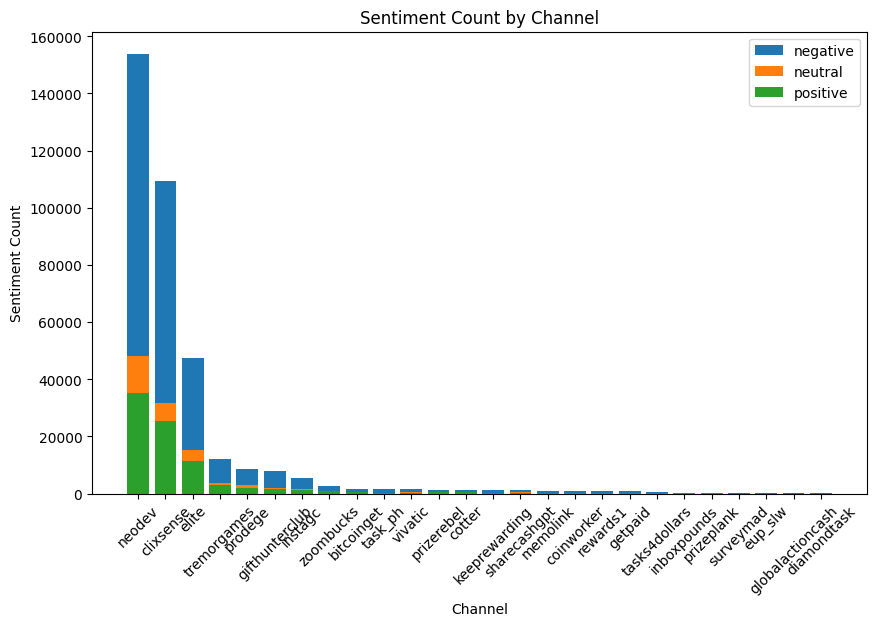

In [25]:
pandas_df = sorted_grouped_df.toPandas()

plt.figure(figsize=(10, 6))
for sentiment in pandas_df['airline_sentiment'].unique():
    subset_df = pandas_df[pandas_df['airline_sentiment'] == sentiment]
    plt.bar(subset_df['_channel'], subset_df['sentiment_count'], label=sentiment)

plt.xlabel('Channel')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Count by Channel')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
from pyspark.sql.functions import col, count, countDistinct, desc

# Group by _channel and airline_sentiment, then count occurrences
airline_grouped_df = df.groupBy("airline", "airline_sentiment") \
    .agg(count("*").alias("sentiment_count"))

airline_sorted_grouped_df = airline_grouped_df.orderBy(col("sentiment_count").desc())
# Show the DataFrame with sentiment counts for each _channel
airline_sorted_grouped_df.show()


+--------------+-----------------+---------------+
|       airline|airline_sentiment|sentiment_count|
+--------------+-----------------+---------------+
|        United|         negative|          97870|
|      American|         negative|          90474|
|    US Airways|         negative|          71721|
|     Southwest|         negative|          49888|
|         Delta|         negative|          47524|
|     Southwest|          neutral|          26290|
|        United|          neutral|          25590|
|         Delta|          neutral|          23184|
|     Southwest|         positive|          20181|
|      American|         positive|          17130|
|      American|          neutral|          16817|
|         Delta|         positive|          16799|
|        United|         positive|          14870|
|    US Airways|          neutral|          13257|
|    US Airways|         positive|          11269|
|Virgin America|         negative|           5372|
|Virgin America|          neutr

In [27]:
pos_airline_sorted_grouped_df = airline_sorted_grouped_df.filter(col("airline_sentiment") == "positive")
pos_airline_sorted_grouped_df.show()

+--------------+-----------------+---------------+
|       airline|airline_sentiment|sentiment_count|
+--------------+-----------------+---------------+
|     Southwest|         positive|          20181|
|      American|         positive|          17130|
|         Delta|         positive|          16799|
|        United|         positive|          14870|
|    US Airways|         positive|          11269|
|Virgin America|         positive|           4463|
+--------------+-----------------+---------------+



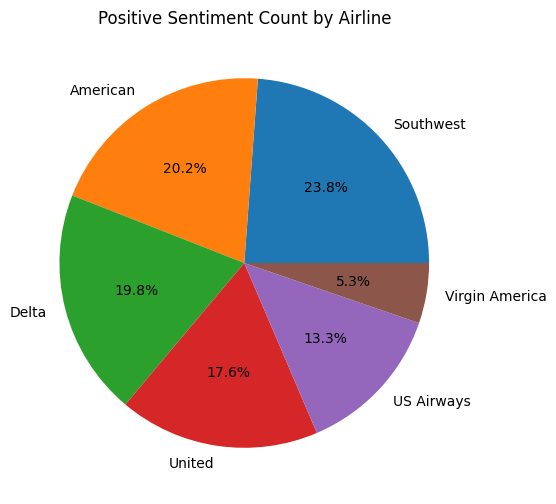

In [28]:
pandas_df = pos_airline_sorted_grouped_df.toPandas()

# plot a piechart of the positive sentiment count for each airline
plt.figure(figsize=(10, 6))
plt.pie(pandas_df['sentiment_count'], labels=pandas_df['airline'], autopct='%1.1f%%')
plt.title('Positive Sentiment Count by Airline')
plt.show()
